# Assesed Solutions 9



# Q1: Lorenz Equations [2 marks]

The Lorenz equations are a fascinating set of differential equations that for certain parameters having a highly chaotic-nature. They describe a simplified model for atmospheric convection and are often ascribed to the idea of the "butterfly effect" [https://en.wikipedia.org/wiki/Butterfly_effect]. The equations are:

$$ \frac{dx}{dt} = \sigma (y-x) $$
$$ \frac{dy}{dt} = rx - y - xz $$
$$ \frac{dz}{dt} = xy - bz $$

- Solve these equations using the Euler method for the case: $\sigma = 10, r = 28, b = \frac{8}{3}$ in the range from t=0 to t=50 with the intial conditions $(x,y,z) = (0,1,0)$. __[1 mark]__
- Plot $y(t)$ and $x(y)$. __[1 mark]__

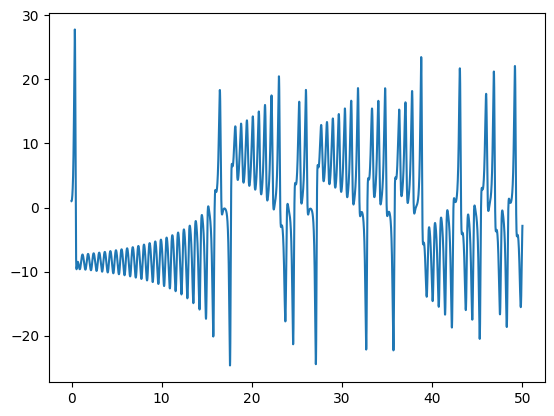

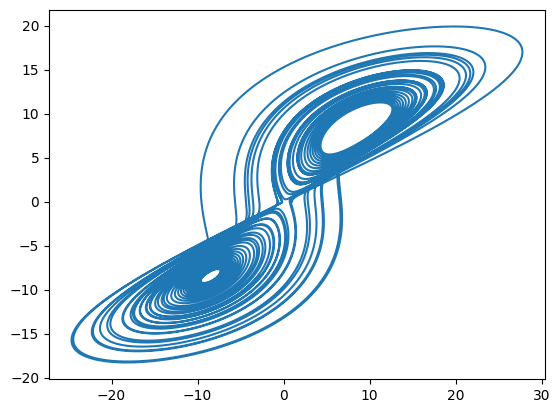

In [9]:
import matplotlib.pyplot as mpl;

# Defining constants
sigma = 10;
r = 28;
b = 8/3;

# t ranges from 0 to 50
tMinimum = 0;
tMaximum = 50;

# Defining the initual conditions as well as the storage variables for t + h
x0 = 0;
y0 = 1;
z0 = 0;
x1 = 0;
y1 = 0;
z1 = 0;

# Defining the number of points used
N = 100000;

# Defining arrays to store values for graphing
tPoints = [];
xPoints = [];
yPoints = [];
zPoints = [];

# This applies eulers method to the equations
h = (tMaximum - tMinimum) / N;
for n in range(1, N):
    tPoints.append(tMinimum + n*h);

    x1 = x0 + h * (sigma * (y0 - x0));
    y1 = y0 + h * (r*x0 - y0 - x0*z0);
    z1 = z0 + h * (x0*y0 - b*z0);

    x0 = x1;
    y0 = y1;
    z0 = z1;

    xPoints.append(x0);
    yPoints.append(y0);
    zPoints.append(z0);

mpl.plot(tPoints, yPoints);
mpl.xlabel("t");
mpl.ylabel("y");
mpl.show();

mpl.plot(yPoints, xPoints);
mpl.xlabel("y");
mpl.ylabel("x");
mpl.show();

# Q2: Nonlinear pendulum [4 marks]

Solving the motion of a pendulum usually involves the small angle approximation. Write a code that solves the motion of a pendulum with an arm of length $l$ of 2 m holding a bob of mass $m$. This can be described by the equations:

$$ m l \frac{d^2 \theta}{d t^2} = - mg \sin(\theta) $$


- a) Reformulate this into a set of coupled first-order equations __[1 mark]__
- b) Solve for $\theta(t)$ with a standard condition of $\theta = \frac{\pi}{2}$ at $t=0$ using the Euler method. Make sure you have at least 100,000 points across the 100 seconds. What is happening to the amplitude (Hint: something is going wrong)? Change the maximum time to make it clearer. __[2 marks]__
- c) Use a scipy library (e.g. `odeint`) to solve the same problem and demonstrate a stable solution  __[1 mark]__  NOTE: It may be useful to find an example use of odeint or a similar library here to see how it is used, __for this question only__ taking an example code online and __reformulating__ it for our example is acceptable. __To get the marks it should be fully commented to show you understand what it does__. This is a useful skill to learn - don't just copy and paste cody without thinking, you should know what it does!

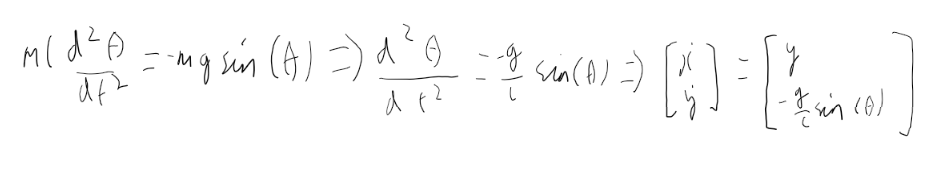

Where x = theta, y = theta dot, z = [x, y]

The boundary is [pi/2, 0]

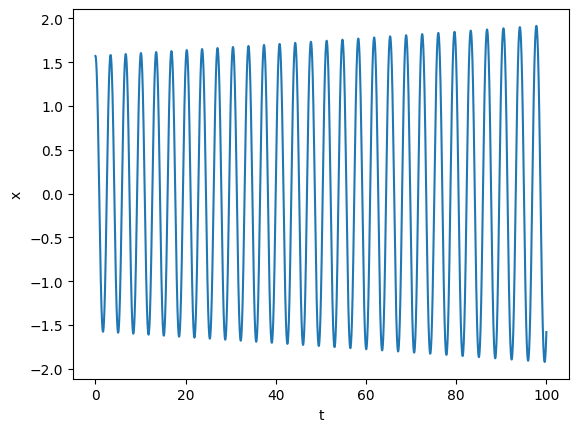

The graph above shows the amplitude increasing, which isn't expected.


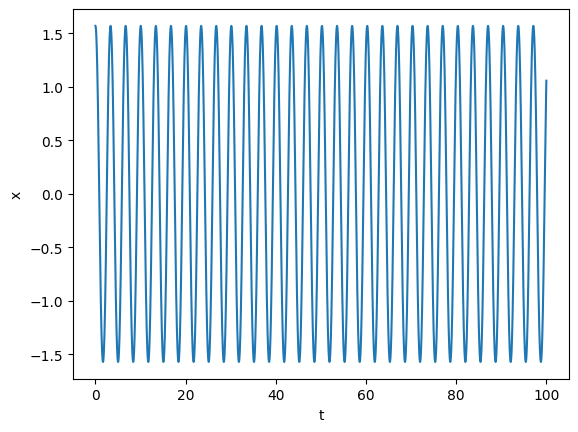

This plot does not have the same issue, and shows a system without the amplitude increasing


In [38]:
import matplotlib.pyplot as mpl;
import numpy as np;
import scipy.integrate as sc;

# Defining our constants
g = 9.81;
l = 2;

# t varies between 0 and 100
tMinimum = 0;
tMaximum = 100;

# This defines are two variables x and y
x0 = np.pi / 2; # x is theta
y0 = 0; # y is theta dot
x1 = 0;
y1 = 0;

# The number of points being used
N = 100000;

# Arrays to store the calculated points for plotting
tPoints = [];
xPoints = [];
yPoints = [];

# Iterating eulers method
h = (tMaximum - tMinimum) / N;
for n in range(1, N):
    tPoints.append(tMinimum + n*h);

    x1 = x0 + h * y0;
    y1 = y0 + h * -1 * np.sin(x0) * g / l;

    x0 = x1;
    y0 = y1;

    xPoints.append(x0);
    yPoints.append(y0);

# Graph the approximated solution
mpl.plot(tPoints, xPoints);
mpl.xlabel("t");
mpl.ylabel("x");
mpl.show();

print ("The graph above shows the amplitude increasing, which isn't expected.")

# A model is defined which describes theta as an array of x and y
# This model is off the derivative of the array
# z = [x, y], where z = [x, y] = theta (as an array of x and y), x = theta, y = xdot
def model(z, t):
    x = z[0]; # This assigns x as the first item in the array z
    y = z[1]; # This assigns y as the second item in the array z
    dxdt = y; # xdot is equal to y
    dydt = (-1 * np.sin(x) * g / l); # ydot is equal to the equation shown above
    dzdt = [dxdt, dydt];
    return dzdt;

# sc.odeint takes the model and finds z from dz/dt, using initual conditions as shown and at the points t as described
t = np.linspace(0, 100, 100001);
xy = sc.odeint(model, [np.pi / 2, 0], t);

# To plot x and t, the first column of z is needed
mpl.plot(t, xy[:, 0]);

# Defining axis labels
mpl.xlabel("t");
mpl.ylabel("x");
mpl.show();

print("This plot does not have the same issue, and shows a system without the amplitude increasing")